# Creating Linear Regression Models Based on The World Happiness Report

In this project, I will analyze the *World Happiness Report dataset* (version 2) for the year of 2019. My specific aim is to examine the correlation between variables, and to construct several linear regression models. My research will center on three topics. First, I will look at the relationship between *GDP per capita* and *healthy life expectancy*. Second, I will examine the relationship between *GDP per capita* and the *freedom to make life choices*. Finally, I will focus on the relationship between *perceptions of corruption* and the *freedom to make life choices*. This project includes the following methods and techniques:

1. **Data Wrangling:** importing data, evaluating missing data, and ensuring correct format.
2. **Analysis:** evaluating data types, looking at the summary statistics, identifying outliers, binning, and performing linear regression analysis.
3. **Data Visualization:** creating histograms, bin visualizations, and scatter plots.

The dataset contains several interesting fields: *overall rank*, *country or region*, *score* (i.e., happiness score), *GDP per capita*, *social support*, *healthy life expectancy*, *freedom to make life choices*, *generosity*, and *perceptions of corruption*.

See the associated *Read Me* file for more information on the tools, libraries, and dependencies.

## Author
Adam C. Sanders

## Acknowledgements

Many thanks to the **Sustainable Development Solutions Network** for providing this information. The dataset can be downloaded at Kaggle here: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv


## Table of contents


This notebook is partioned into the following sections:
1. The Primary Questions
2. Hypothesis
3. Data Wrangling
4. Data Analysis & Data Visualization
5. Results

## 1. The Primary Questions

The primary questions that I will investigate are the following:
1. How does *GDP per capita* relate to *healthy life expectancy*?
2. What is the relationship between *GDP per capita* and the *freedom to make life choices*?
3. What is the relationship between *perceptions of corruption* and the *freedom to make life choices*?

## Hypotheses

Given the primary quesitons above, my initial hypotheses are the following:
1. There is a strong positive correlation between *GDP per capita* and *healthy life expectancy*. The stronger the *GDP per capita* score, the stronger the *healthy life expectancy* score.
2. There is also a strong positive correlation between *GDP per capita* and the *freedom to make life choices*.
3. There is a strong negative correlation between *perceptions of corruption* and the *freedom to make life choices*. That is to say, as perceptions of corruption increase, there is a decrease in the sense that one is free to make life choices.

## 3 Data Wrangling

### 3.1 Importing libraries and our data

In [1]:
# Import pandas, numpy, matplotlib, and seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import dataset and set it to dataframe "df"
path = "C:/Users/adams/Desktop/Data Science/Datasets/2019_world_happiness_report.csv"
df = pd.read_csv(path)

#display the first 5 rows of df
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
# Display the last rows of df
df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


### 3.2 Determing the shape of the dataframe and the data types

In [4]:
# Display the shape of the datafram
print(df.shape)

(156, 9)


In [5]:
# Display the data types for the individual columns
# If necessary, convert incorrect data types by using the ".astype()" function
print(df.dtypes)

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object


The data types seem correct. Consequently, we do not need to convert any of the data types in our dataframe.

### 3.3 Dealing with missing values

First, check the dataframe to see if there are any missing values or NaN values.

In [6]:
# Check whether there are any missing values or NaN values.
# If there are missing values, employ the ".replace" function to make necessary changes.
df.isnull()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
151,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False


In [7]:
# Employ a for loop to count the number of True or False values to locate missing values
df_missing = df.isnull()
for column in df_missing.columns.values.tolist():
    print(column)
    print(df_missing[column].value_counts())
    print("")
    
# There are no missing values

Overall rank
False    156
Name: Overall rank, dtype: int64

Country or region
False    156
Name: Country or region, dtype: int64

Score
False    156
Name: Score, dtype: int64

GDP per capita
False    156
Name: GDP per capita, dtype: int64

Social support
False    156
Name: Social support, dtype: int64

Healthy life expectancy
False    156
Name: Healthy life expectancy, dtype: int64

Freedom to make life choices
False    156
Name: Freedom to make life choices, dtype: int64

Generosity
False    156
Name: Generosity, dtype: int64

Perceptions of corruption
False    156
Name: Perceptions of corruption, dtype: int64



In [8]:
# Alternatively, we could use isnull().sum() to verify that there are no missing values 
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Given that I will be using *GDP per capita* as a predictor variable for other variables in the dataframe, I want to know if the "GDP per capita" column has any instances of 0.0. Any instance of 0.0 indicates missing data for that column. I will then proceed to modify the dataframe to eliminate those values.

In [9]:
df.loc[df["GDP per capita"] == 0.0]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
111,112,Somalia,4.668,0.0,0.698,0.268,0.559,0.243,0.27


Somalia has a score of 0.0 for *GDP per capita*. Since this is the only row that is missing information in this column, it might be easier to simply drop this row. 

In [10]:
# Drop Somalia from the df
df.drop(111, axis=0, inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [11]:
# Re-check the first 5 rows of our new dataframe, df
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [12]:
# Re-check the last 5 rows and verify that the row containing "Somalia" was dropped
df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
150,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
151,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
152,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
153,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
154,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [13]:
# The shape of our new dataframe
print(df.shape)

(155, 9)


## 3.4 Data Standardization

Given the current dataset, there is no need to conver the format of our data or the format of any units of measurement.

## 4. Data Analysis & Data Visualization

### 4.1 Summary Statistics

In [14]:
# Generate the summary statistics for our dataframe, "df"
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.283871,5.411865,0.910987,1.212110,0.728194,0.391497,0.184471,0.109574
std,45.242888,1.115128,0.392925,0.297307,0.240080,0.143123,0.095447,0.093965
min,1.000000,2.853000,0.026000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.500000,4.541000,0.615000,1.057000,0.553000,0.307000,0.108500,0.047000
50%,78.000000,5.386000,0.960000,1.274000,0.789000,0.417000,0.177000,0.085000
75%,117.500000,6.187000,1.234000,1.453000,0.882500,0.502500,0.249500,0.140500
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


**General Observations**
1. The maximum happiness score is 7.769 and the minimum score is 2.853.
2. The mean happiness score is 5.411865.
3. The maximum GDP per capita score is 1.684 and the minimum is 0.026.
4. The mean GDP per capita is 0.910897.
5. The maximum score for healthy life expectancy is 1.141 and the minimum is 0.0.
6. The mean score for healthy life expectancy is 0.728194.
7. The maximum score for the freedom to make life choices is 0.631 and the minimum is 0.0.
8. The mean score for the freedom to make life choices is 0.391497.

### 4.2 Frequency Distributions & Histograms

In this section, I will construct a few histograms for several of the vairables to determine their frequency distributions.

**GDP per capita**

Text(0.5, 1.0, 'The distribution of GDP per capita')

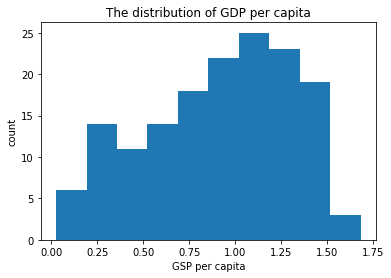

In [15]:
# Create a histogram for GDP per capita
plt.hist(df["GDP per capita"])

# Set the labels and title
plt.xlabel("GSP per capita")
plt.ylabel("count")
plt.title("The distribution of GDP per capita")

**Remark:** The histogram for *GDP per capita* is skewed left.

**Healthy Life Expectancy**

Text(0.5, 1.0, 'The distribution of Healthy life expectancy')

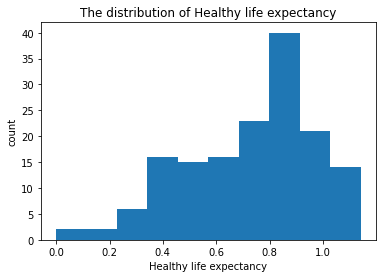

In [16]:
# Create a histogram for Healthy life expectancy
plt.hist(df["Healthy life expectancy"])

# Set the labels and title
plt.xlabel("Healthy life expectancy")
plt.ylabel("count")
plt.title("The distribution of Healthy life expectancy")

**Happiness Scores**

Text(0.5, 1.0, 'The distribution of Happiness Scores')

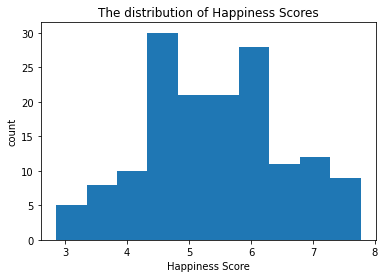

In [17]:
# Create a histogram for Happiness scores
plt.hist(df["Score"])

# Set the labels and title
plt.xlabel("Happiness Score")
plt.ylabel("count")
plt.title("The distribution of Happiness Scores")

**Observation**: There appears to be a bimodal distribution. I will perform some binning.

### 4.3 Binning



Let us perform binning on *Happiness score* and *GDP per capita*. Binning might illuminate further characteristics of the data. 

**Happiness Score**

First, I'll create several bins to help order our happiness scores. These bins will be labeled, "Low Happiness", "Medium Happiness", and "High Happiness".

In [18]:
# Use NumPy's linspace to partition the values into three categories
happiness_bins = np.linspace(min(df["Score"]), max(df["Score"]), 4)
happiness_bins

array([2.853     , 4.49166667, 6.13033333, 7.769     ])

In [19]:
# Create labels for our bins
bin_names = ["Low Happiness", "Medium Happiness", "High Happiness"]

In [20]:
# Create a table that shows the groupings
df["Happiness_binned"] = pd.cut(df["Score"], happiness_bins, labels=bin_names, include_lowest=True)

# Display the first 5 rows of our table with bins
df[["Score", "Happiness_binned"]].head(5)

,Score,Happiness_binned
0,7.769,High Happiness
1,7.600,High Happiness
2,7.554,High Happiness
3,7.494,High Happiness
4,7.488,High Happiness


In [21]:
# We will also display the last 5 rows of our table with bins
df[["Score", "Happiness_binned"]].tail(5)

,Score,Happiness_binned
150,3.334,Low Happiness
151,3.231,Low Happiness
152,3.203,Low Happiness
153,3.083,Low Happiness
154,2.853,Low Happiness


**Binning Visualization for Happiness**

Text(0.5, 1.0, 'Happiness Bins')

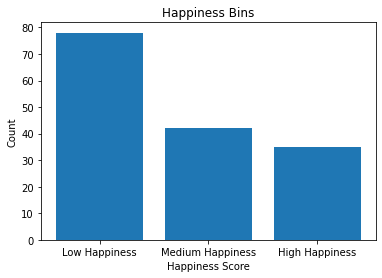

In [22]:
# Create a visualization of our results from the binning process
plt.bar(bin_names, df["Happiness_binned"].value_counts())

# Add labels and a title
plt.xlabel("Happiness Score")
plt.ylabel("Count")
plt.title("Happiness Bins")

**Remark:** Binning gives us new insight into the data. There are a lot of countries that fall into the "Low Happiness" group. But it is also show that the group sizes for "Medium Happiness" and "High Happiness" are similar.

**GDP per capita and Binning**

Similarly, I'll create bins for *GDP per capita*. Afterwards we will visualize the binning.

In [23]:
# Use NumPy's linspace to partition the values into three categories
GDP_bins = np.linspace(min(df["GDP per capita"]), max(df["GDP per capita"]), 4)
GDP_bins

array([0.026     , 0.57866667, 1.13133333, 1.684     ])

In [24]:
# Create labels for the bins
GDP_bin_names = ["Low GDP per capita", "Medium GDP per capita", "High GDP per capita"]

In [25]:
# Create a table that shows the groupings
df["GDP_binned"] = pd.cut(df["GDP per capita"], GDP_bins, labels=GDP_bin_names, include_lowest=True)

# Display the first 5 rows of our table with bins
df[["GDP per capita", "GDP_binned"]].head(5)

,GDP per capita,GDP_binned
0,1.340,High GDP per capita
1,1.383,High GDP per capita
2,1.488,High GDP per capita
3,1.380,High GDP per capita
4,1.396,High GDP per capita


In [26]:
# I'll also display the last 5 rows
df[["GDP per capita", "GDP_binned"]].tail(5)

,GDP per capita,GDP_binned
150,0.359,Low GDP per capita
151,0.476,Low GDP per capita
152,0.350,Low GDP per capita
153,0.026,Low GDP per capita
154,0.306,Low GDP per capita


**Binning Visualization for GDP per capita**

Text(0.5, 1.0, 'GDP Bins')

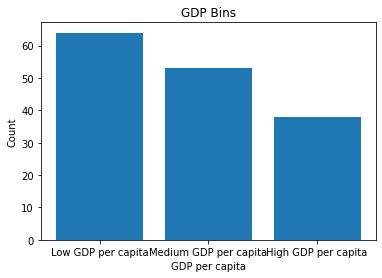

In [29]:
# Create a visualization of our results from the binning process
plt.bar(GDP_bin_names, df["GDP_binned"].value_counts())

# Add labels and a title
plt.xlabel("GDP per capita")
plt.ylabel("Count")
plt.title("GDP Bins")

### 4.4 Linear Regression

In this section I'll build several linear regression models.

**The relationship between GDP per capita and healthy life expectancy**


Let us create a scatter plot and determine the correlation between these two variables to determine if *GDP per capita* is a good predictor for healthy *life expectancy*.

(0.0, 1.2181086877614666)

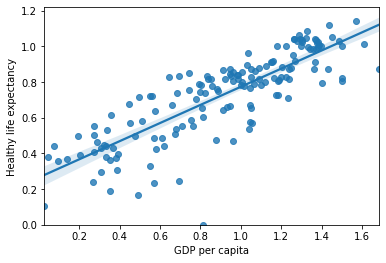

In [30]:
# Create a scatter plot with a fitted regression line
sns.regplot(x = "GDP per capita", y = "Healthy life expectancy", data = df)
plt.ylim(0,)

In [31]:
# Determine correlation
df[["GDP per capita", "Healthy life expectancy"]].corr()

,GDP per capita,Healthy life expectancy
GDP per capita,1.000000,0.831167
Healthy life expectancy,0.831167,1.000000


**Results:** Correlation between *Healthy life expectancy* and *GDP per capita* is 0.831167. It is shown that there is a fairly *strong* positive linear relationship. Morevoer, the spread around the regression line gets tighter as GDP per capita increases.

**The relationship between GDP per capita and the freedom to make choices**

We will create another scatter plot and determine the correlation between these two variables to see if *GDP per capita* is a good predictor of the *freedom to make life choices*.

(0.0, 0.66255)

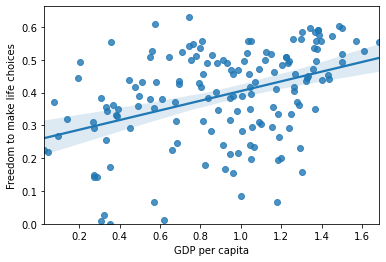

In [33]:
# Create another scatter plot with a fitted regression line
sns.regplot(x = "GDP per capita", y = "Freedom to make life choices", data = df)
plt.ylim(0,)

In [34]:
# Determine the correlation
df[["GDP per capita", "Freedom to make life choices"]].corr()

,GDP per capita,Freedom to make life choices
GDP per capita,1.000000,0.404803
Freedom to make life choices,0.404803,1.000000


**Results:** the regression line has a positive slope, and the correlation between these two variables is 0.404803. Hence, there is a weak to moderate amount of positive correlation. Indeed, the correlation here is much weaker than the correlation between *GDP per capita* and *Healthy life expectancy*. It is also important to note that there is more variation or spread around the trend line. These considerations imply that *GDP per capita* might not always be the best predictor for the *freedom to make life choices*.

**The relationship between perceptions of corruption and the freedom to make life choices**

We will create a final scatter plot. Afterwards, we will examine the correlation and determine if an increase in perceptions of corruption increase corresponds to a decrease in the level of being free to make life choices.

(0.0, 0.6925873947319798)

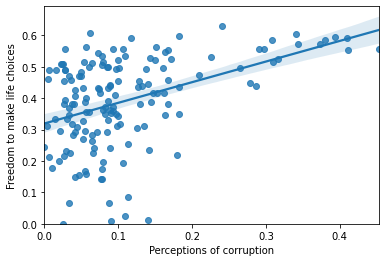

In [35]:
# Create our final scatter plot with a fitted regression line
sns.regplot(x = "Perceptions of corruption", y = "Freedom to make life choices", data = df)
plt.ylim(0,)

In [36]:
# Determine the correlation

df[["Perceptions of corruption", "Freedom to make life choices"]].corr()

,Perceptions of corruption,Freedom to make life choices
Perceptions of corruption,1.000000,0.432012
Freedom to make life choices,0.432012,1.000000


**Remarks:** It is shown that there is a 0.432012 correlation. Consequently, there is a weak to moderate positive correlation. However, there is also quite a bit of spread around the trend line. Hence, *Perceptions of corruption* might not be the best predictor for *Freedom to make life choices*.

## 5. Summary & Results

**Project Overview**

In this project, I analyzed data and constructed several linear regression models based on the *World Happiness Report*. During this pocess, I was interested in several topics: (1) the relationship between *GDP per capita* and *healthy life expectancy*; (2) the relationship between *GDP per capita* and the *freedom to make life choices*; and (3) the relationship between *perceptions of corruption* and the *freedom to make life choices*. This project involved the following processes:
1. Cleaning and evaluating data.
2. Analyzing data and constructing linear regression models.
3. Visualizing the data.


**Results**

Several surprising results emerged from the analysis.
1. There was a strong positive correlation of approximately 0.83 between *GDP per capita* and *healthy life expectancy*. Indeed, it appears that *GDP per capita* is a strong predictor for *healthy life expectancy*. This, however, is not surprising. A strong rating for *GDP per capita* would likely indicate that the corresponding country has the resources and means to promote healthy living witng data.
2. There is only a weak to moderate positive correlation between *GDP per capita* and the *freedom to make life choices*. Moreover, there is quite a bit of spread or variance around the trend line. This indicates that *GDP per capita* is not the best predictor for *freedom to make life choices*.  
3. There is a weak to moderate positive correlation of approximately 0.432 between *perceptions of corruption* and the *freedom of making life choices*. This was surprising. Intuitively, it seems that if one felt that there was an increase in corruption, then one might plausibly feel that there were more social factors and obstacles that restricted his or her personal freedom. Given my starting hypothesis, I originally expected to see a strong negative relationship. However, this is not the case. One possible explanation is that people might think that an increase in corruption within their country indicates that either (1) people are under less restrictions to comply with laws and social norms, or (2) people have more abilities and resources to easily circumvent these rules. Consequently, one might interpret these environments as being more free. This is an interesting topic worth exploring in more detail.